In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv('attacks.csv', encoding = 'latin-1')

In [2]:
pd.set_option("display.max_columns",None) # configuro para ver todas las columnas
data.dtypes # observo el tipo de dato de cada columna, las ultimas 2 están vacias 

pd.set_option("display.max_rows",None) # configuro para ver todas las columnas


#Metodología, 

<h3>Objetivo:<h3>

Saber el número de ataques de tiburones por paises

Análisis: 
las columnas date, case_number, case_number1, case_number2, hablan de fechas(cada una tiene un formato diferente). Se podrian llegar a relacionar con las col 'year' y 'time'
Las col 'href' y 'href_formula' estan duplicadas, me tengo que cargar alguna de ellas
Las dos ultimas col 'unnamed:_22', 'unnamed:_23' las cambio de nombre a borrar y las relleno con unknow

In [3]:

data.columns # veo solo las columnas 
data.columns = [e.lower().strip().replace(" ", "")for e in data.columns]
# e.lower : pongo todo en minúsculas
#strip, sustituye en ambos lados 



In [4]:
data.info() # verl el tipo de dato y los NO nulos



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            8702 non-null   object 
 1   date                  6302 non-null   object 
 2   year                  6300 non-null   float64
 3   type                  6298 non-null   object 
 4   country               6252 non-null   object 
 5   area                  5847 non-null   object 
 6   location              5762 non-null   object 
 7   activity              5758 non-null   object 
 8   name                  6092 non-null   object 
 9   sex                   5737 non-null   object 
 10  age                   3471 non-null   object 
 11  injury                6274 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  2948 non-null   object 
 14  species               3464 non-null   object 
 15  investigatororsourc

In [5]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
# Renombro las columnas incesarios para mi Objetivo, ya que la restricción es NO borrar columnas
data = data.rename(columns = {"unnamed:22": "borrar1", "unnamed:23"  :"borrar2"})
columnas = data.columns # Guardo todas las columnas
data.shape ## filas originales 25723

(25723, 24)

In [7]:
data = data.drop_duplicates(subset=columnas) ##Borro las filas duplicadas
data.fillna("'unknown", inplace=True) #relleno todos los valores nulos con unknow
data.dropna(inplace=True) ## PASO SUPER IMPORTANTE 


data.shape # me quedo con 6312 tengo que bajar a 2500


(6312, 24)

In [8]:
data.isnull().sum() # veo si los valores nulos de cada columna  han sido rellenados, funcionó!!!!

casenumber              0
date                    0
year                    0
type                    0
country                 0
area                    0
location                0
activity                0
name                    0
sex                     0
age                     0
injury                  0
fatal(y/n)              0
time                    0
species                 0
investigatororsource    0
pdf                     0
hrefformula             0
href                    0
casenumber.1            0
casenumber.2            0
originalorder           0
borrar1                 0
borrar2                 0
dtype: int64

In [9]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,borrar1,borrar2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,'unknown,'unknown
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,'unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,'unknown,'unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,'unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,'unknown,'unknown
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,'unknown,Minor injury to lower leg,N,'unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,'unknown,'unknown
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,'unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,'unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,'unknown,'unknown


In [10]:
data2 = pd.DataFrame(data['hrefformula'].fillna('unknown')) ## NO PUEDO UNICAMENTE RELLENAR LOS VALORES DE UNA COLUMNA POR UNKNOW, 
#pero si puedo compar con otra columna y remplazar por unknow se hace mas adelantes 



In [11]:
# Comparo las dos columnas y lleno  los datos repetidos con repated
comparacion = data['hrefformula'] == data['href'] 
comparacion.value_counts()
data.loc[comparacion, 'hrefformula'] = 'repeated' ## Funcinó !!
#Loc se usa para modificar columnas y filas  y lo transforma a boolean t/f)



In [12]:
# Hacemos lo mismo con las columnas casenumber.1 y casenumber.2
comparacion2 = data['casenumber.1'] == data['casenumber.2'] 
data.loc[comparacion2, 'casenumber.1'] = 'repeated' ## Funcinó !!



In [13]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,borrar1,borrar2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2018.06.25,6303.0,'unknown,'unknown
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,'unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2018.06.18,6302.0,'unknown,'unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,'unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2018.06.09,6301.0,'unknown,'unknown
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,'unknown,Minor injury to lower leg,N,'unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2018.06.08,6300.0,'unknown,'unknown
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,'unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,'unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2018.06.04,6299.0,'unknown,'unknown


In [14]:
species_count = data.species.value_counts()
data = data[data["species"].isin(species_count[species_count > 1].index)]
data.shape

(5095, 24)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5095 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   casenumber            5095 non-null   object
 1   date                  5095 non-null   object
 2   year                  5095 non-null   object
 3   type                  5095 non-null   object
 4   country               5095 non-null   object
 5   area                  5095 non-null   object
 6   location              5095 non-null   object
 7   activity              5095 non-null   object
 8   name                  5095 non-null   object
 9   sex                   5095 non-null   object
 10  age                   5095 non-null   object
 11  injury                5095 non-null   object
 12  fatal(y/n)            5095 non-null   object
 13  time                  5095 non-null   object
 14  species               5095 non-null   object
 15  investigatororsource  5095 non-null  

<h3>Limpieza segunda ronda<h3>
<h5>Exploración de las columnas casenumber,date, year están relaciondas<h5>

In [16]:
data['date'] = data['date'].str.extract(r'(\d+)')
# Dejo unicamnete los números


In [37]:
data['date'] = data['date'].fillna(-1)
#convierto los Nan en -1, para luego seleccionar solo los años <1950
data['date'] = data['date'].astype(int)
# lo convierto a enteror
data= data[(data['date'] > 1950) & (data['date'] < 2023)].copy()
# me quedo solo con las filas mayores a 1950 y menores al 2023




In [44]:
data.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,borrar1,borrar2
86,repeated,2017,repeated,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,'unknown,'unknown,'unknown,"sharks rammed boats, no injury to occupants",N,'unknown,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2017.09.14,6217.0,'unknown,'unknown
131,repeated,2017,repeated,Unprovoked,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Surfing,male,M,'unknown,Injuries to hand and wrist,N,'unknown,'unknown,"Tahiti Infos, 6/6/2017",2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2017.06.05,6172.0,'unknown,'unknown
226,repeated,2016,repeated,Invalid,MEXICO,'unknown,Guadalupe Island,Cage Diving,'unknown,'unknown,'unknown,"No injury to divers, white shark breached cage",'unknown,'unknown,Invalid,K. Yonker,2016.09.00-Breach.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2016.09.00,6077.0,'unknown,'unknown
370,repeated,2015,repeated,Unprovoked,FIJI,'unknown,'unknown,Spearfishing,Viliame Lautiki,M,'unknown,Leg bitten,N,'unknown,Tiger shark,"Fiji Times, 2/8/2016",2015.09.00-Lautiki.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2015.09.00,5933.0,'unknown,'unknown
504,repeated,2014,repeated,Unprovoked,SPAIN,Catalonia,Salou,Playing with an air mattress,male,M,16,Lacerations to right hand,N,'unknown,'unknown,"A. Brenneka, Shark Attack Survivors",2014.09.00-Salou.pdf,repeated,http://sharkattackfile.net/spreadsheets/pdf_di...,repeated,2014.09.00,5799.0,'unknown,'unknown


In [42]:
data['casenumber'] = 'repeated'
data['year'] = 'repeated'
 ## Relleno con repeated las dos columnas ya que son iguales 


In [54]:
data.shape # me quedo con 373 filas y 24 columnas. 

(373, 24)

In [57]:
data.country.value_counts()

USA                       77
PAPUA NEW GUINEA          39
AUSTRALIA                 22
SOUTH AFRICA              19
NEW CALEDONIA             18
MEXICO                    12
FIJI                      12
IRAN                      11
BAHAMAS                    8
MOZAMBIQUE                 7
IRAQ                       7
'unknown                   7
PANAMA                     6
ITALY                      6
SENEGAL                    5
NEW ZEALAND                5
FRENCH POLYNESIA           5
SPAIN                      5
VANUATU                    5
CUBA                       4
REUNION                    4
TANZANIA                   4
GREECE                     4
TONGA                      3
UNITED KINGDOM             3
SOLOMON ISLANDS            3
PHILIPPINES                3
SOMALIA                    3
MARSHALL ISLANDS           3
BRAZIL                     3
JAPAN                      2
MID ATLANTIC OCEAN         2
KENYA                      2
INDONESIA                  2
COSTA RICA    

Group by : agrupar por 

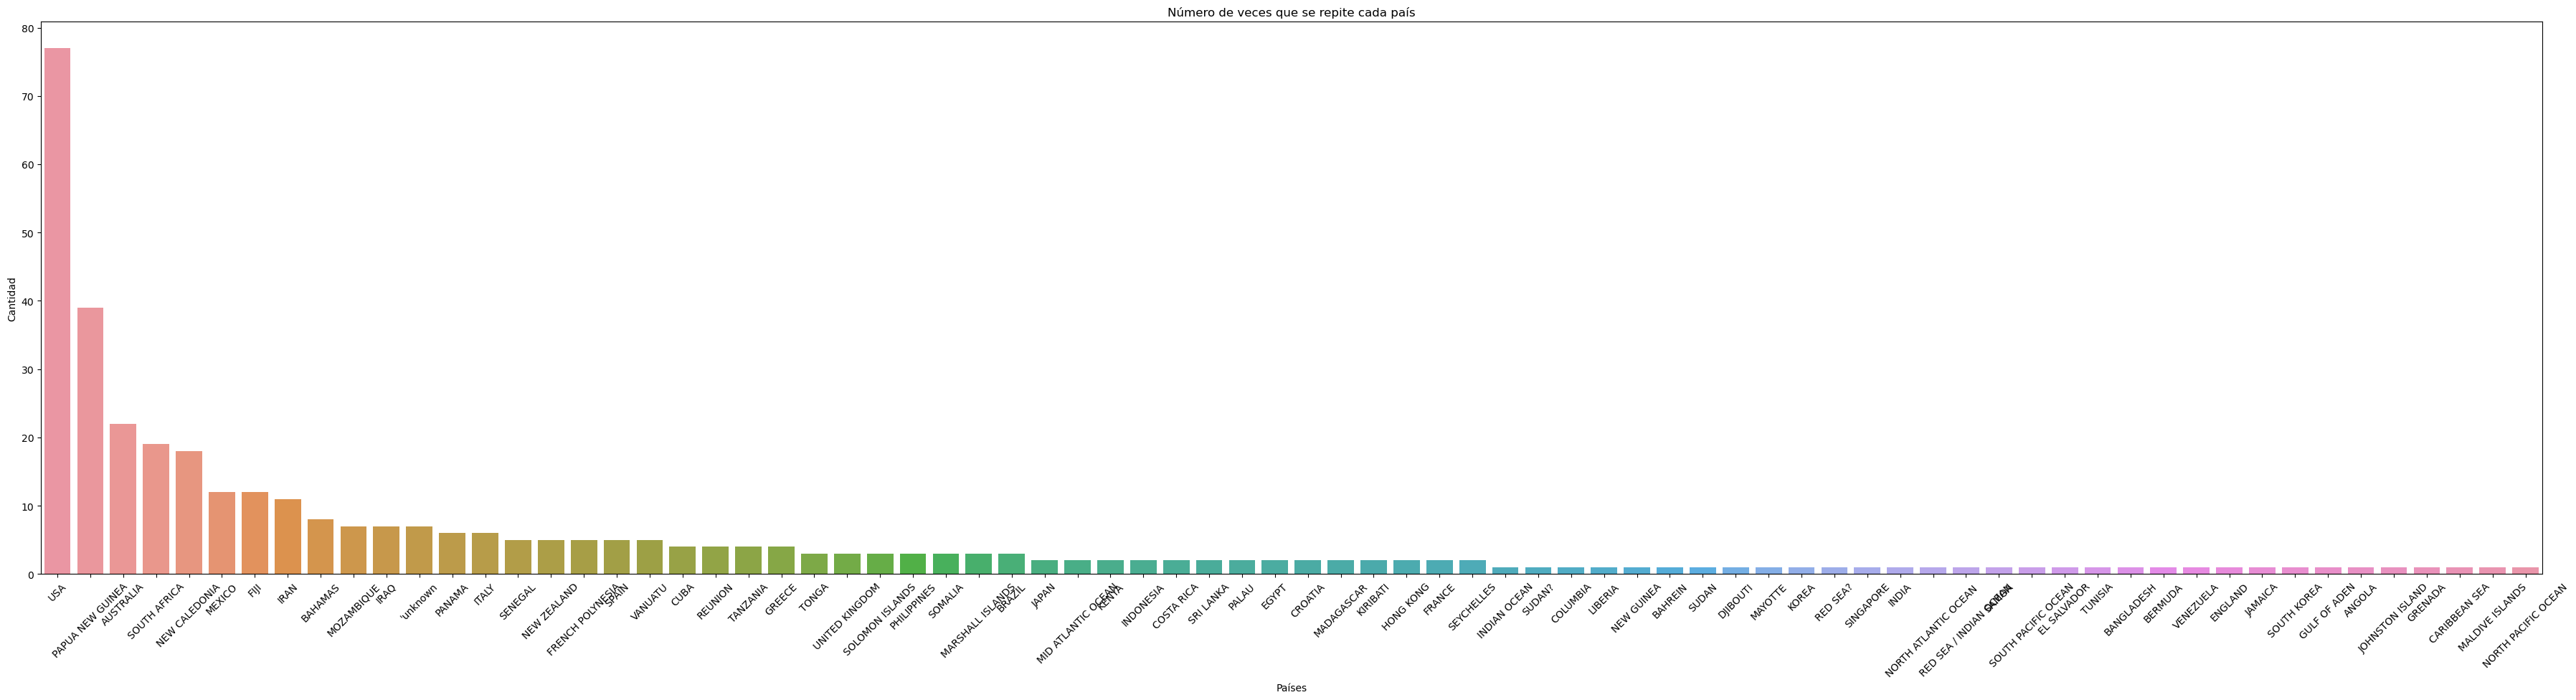

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el recuento de ocurrencias de cada país
count_data = data['country'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(45, 10))
sns.barplot(x=count_data.index, y=count_data.values)
plt.xlabel('Países')
plt.ylabel('Cantidad')
plt.title('Número de veces que se repite cada país')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()